In [4]:
import pandas as pd
import numpy as np

In [5]:
train = pd.DataFrame(pd.read_csv('train.csv'))
test = pd.DataFrame(pd.read_csv('test.csv'))

In [6]:
train.head()  #training set

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
test.head()  #testing set

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [8]:
print("shape of the training set: ",train.shape)
print("shape of the test set: ", test.shape)

shape of the training set:  (891, 12)
shape of the test set:  (418, 11)


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [11]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

seperate the columns which have many null values


In [13]:
# df.isnull().sum() returns a pandas series with columns name as the label index
# and total count of null values in the column as it's value
# And we are storing only those columns which have more than 35% of the data missing.

drop_col_train = train.isnull().sum()[train.isnull().sum()>(35/100*train.shape[0])]
drop_col_train

Cabin    687
dtype: int64

In [14]:
drop_col_test = test.isnull().sum()[test.isnull().sum()>(35/100*test.shape[0])]
drop_col_test

Cabin    327
dtype: int64

In [15]:
print("train- ",drop_col_train.index)
print("test- ",drop_col_test.index)

train-  Index(['Cabin'], dtype='object')
test-  Index(['Cabin'], dtype='object')


In [16]:
train.drop(drop_col_train.index, axis=1, inplace=True)
test.drop(drop_col_test.index, axis=1, inplace=True)

In [17]:
print("TRAINING SET: \n",train.isnull().sum())
print()
print("TEST SET: \n", test.isnull().sum())

TRAINING SET: 
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

TEST SET: 
 PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            1
Embarked        0
dtype: int64


In [18]:
train.fillna(train.mean(), inplace=True)
test.fillna(test.mean(), inplace=True)

print("TRAIN: \n",train.isnull().sum())
print("TEST: \n",test.isnull().sum())

TRAIN: 
 PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64
TEST: 
 PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


if any column contains string values we see the details seperately and then fill the null values with the most frequent values in the section

In [19]:
train['Embarked'].describe()  #embarked = 2

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [20]:
train['Embarked'].fillna('S', inplace = True)
print("TRAIN: \n",train.isnull().sum())  #embarked = 0

TRAIN: 
 PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [21]:
import seaborn as sns
import matplotlib.pyplot as plt


TRAINING SET 



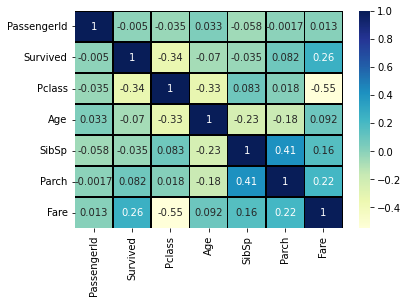

In [22]:
print("TRAINING SET \n")
sns.heatmap(train.corr(), annot = True, cmap="YlGnBu", linecolor='black', linewidths=0.5)

TEST SET 



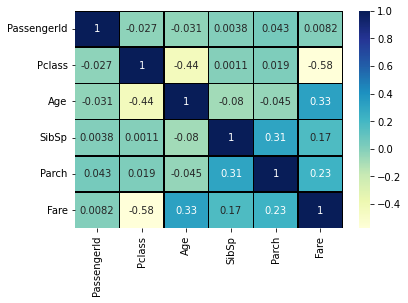

In [23]:
print("TEST SET \n")
sns.heatmap(test.corr(), annot = True, cmap="YlGnBu", linecolor='black', linewidths=0.5)

**sibsp**: Number of Siblings/Spouses Aboard

**parch**: Number of Parents/Children Aboard

So we can make a new column family_size by combining these two columns

In [24]:
train['FamilySize']=train['SibSp']+train['Parch'] #combining two columns
train.drop(['SibSp','Parch'], axis = 1 , inplace = True) #dropping the combined columns

In [25]:
print("Training set Correlation: \n", train[['FamilySize', 'Survived']].corr())

Training set Correlation: 
             FamilySize  Survived
FamilySize    1.000000  0.016639
Survived      0.016639  1.000000


In [26]:
test['FamilySize']=test['SibSp']+test['Parch'] #combining two columns
test.drop(['SibSp','Parch'], axis = 1 , inplace = True) #dropping the combined columns

Family Size in the ship does not have much correlation with the survival rate. Hence we will check if the person being alone affects anything

In [27]:
train['Alone'] = [0 if train['FamilySize'][i]>0 else 1 for i in train.index]
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,FamilySize,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,S,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,S,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,S,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,S,0,1


In [28]:
test['Alone'] = [0 if test['FamilySize'][i]>0 else 1 for i in test.index]  # 1=Alone
test.head()                                                                # 0=Not alone

,PassengerId,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,FamilySize,Alone
0,892,3,"Kelly, Mr. James",male,34.5,330911,7.8292,Q,0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,363272,7.0000,S,1,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,240276,9.6875,Q,0,1
3,895,3,"Wirz, Mr. Albert",male,27.0,315154,8.6625,S,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,3101298,12.2875,S,2,0


In [29]:
train.groupby(['Alone'])['Survived'].mean()

Alone
0    0.505650
1    0.303538
Name: Survived, dtype: float64

If the person is alone he/she has less chance of surviving.

The reason might be the person who is traveling with his family might be belonging to rich class and might be prioritized over other.

In [30]:
train.groupby(['Alone'])['Fare'].mean()

Alone
0    48.832275
1    21.242689
Name: Fare, dtype: float64

So we can see the person travelling with their family have higher average ticket price. Means the person with family have high chances of belonging to a rich family.

In [31]:
train['Sex']=[0 if train['Sex'][i]=='male' else 1 for i in train.index] # 0 = male
train.groupby(['Sex'])['Survived'].mean()                               # 1 = female

Sex
0    0.188908
1    0.742038
Name: Survived, dtype: float64

females have a highes chance of survival than males because females are given a priority.

In [32]:
test['Sex']=[0 if test['Sex'][i]=='male' else 1 for i in test.index]

In [33]:
train.groupby(['Embarked'])['Survived'].mean()

Embarked
C    0.553571
Q    0.389610
S    0.339009
Name: Survived, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


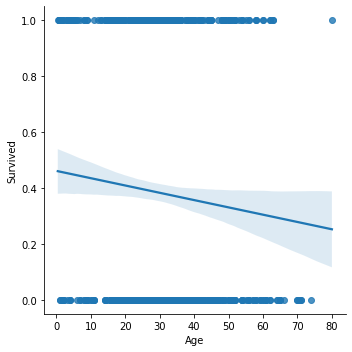

In [34]:
sns.lmplot('Age','Survived', data=train)

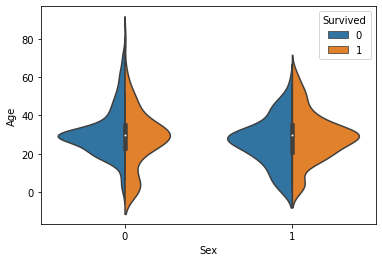

In [35]:
sns.violinplot(x ="Sex", y ="Age", hue ="Survived", data = train , split = True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


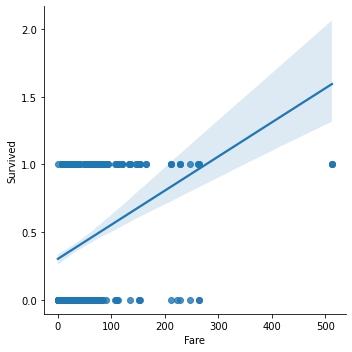

In [36]:
sns.lmplot('Fare','Survived',data=train)

**CONCLUSION**
* Female passengers were prioritized over men.
* People with high class or rich people have higher survivl rate than others.
* The hierarichy might have been followed while saving the passangers.
* Passengers travelling with their family have higher survival rate.
* Passengers who borded the ship at Cherbourg, survived more in proportion then the others.



Dropping unnecessary columns

In [37]:
train.drop(['Ticket', 'FamilySize', 'Name'], axis = 1, inplace=True)

In [38]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Alone
0,1,0,3,0,22.0,7.2500,S,0
1,2,1,1,1,38.0,71.2833,C,0
2,3,1,3,1,26.0,7.9250,S,1
3,4,1,1,1,35.0,53.1000,S,0
4,5,0,3,0,35.0,8.0500,S,1


In [39]:
test.drop(['Ticket', 'FamilySize', 'Name'], axis = 1, inplace=True)
test.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Alone
0,892,3,0,34.5,7.8292,Q,1
1,893,3,1,47.0,7.0000,S,0
2,894,2,0,62.0,9.6875,Q,1
3,895,3,0,27.0,8.6625,S,1
4,896,3,1,22.0,12.2875,S,0


'Embarked' does not conatin numerical values, instead contains string. So to tackle the situation we take the help of a method called **ONE HOT ENCODING** aka *dummy variables*

In [40]:
new_train = pd.get_dummies(train, prefix_sep='_', columns=['Embarked'])
new_train.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Alone,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,0,22.0,7.2500,0,0,0,1
1,2,1,1,1,38.0,71.2833,0,1,0,0
2,3,1,3,1,26.0,7.9250,1,0,0,1
3,4,1,1,1,35.0,53.1000,0,0,0,1
4,5,0,3,0,35.0,8.0500,1,0,0,1


In [41]:
new_test = pd.get_dummies(test, prefix_sep='_', columns=['Embarked'])
new_test.head()

,PassengerId,Pclass,Sex,Age,Fare,Alone,Embarked_C,Embarked_Q,Embarked_S
0,892,3,0,34.5,7.8292,1,0,1,0
1,893,3,1,47.0,7.0000,0,0,0,1
2,894,2,0,62.0,9.6875,1,0,1,0
3,895,3,0,27.0,8.6625,1,0,0,1
4,896,3,1,22.0,12.2875,0,0,0,1


In [57]:
#seperating the target variable
x_train= new_train.drop('Survived', axis = 1)
y_train= train['Survived']  #target variable

print(x_train)
print(y_train)

print(x_train.shape)
print(y_train.shape)

     PassengerId  Pclass  Sex  ...  Embarked_C  Embarked_Q  Embarked_S
0              1       3    0  ...           0           0           1
1              2       1    1  ...           1           0           0
2              3       3    1  ...           0           0           1
3              4       1    1  ...           0           0           1
4              5       3    0  ...           0           0           1
..           ...     ...  ...  ...         ...         ...         ...
886          887       2    0  ...           0           0           1
887          888       1    1  ...           0           0           1
888          889       3    1  ...           0           0           1
889          890       1    0  ...           1           0           0
890          891       3    0  ...           0           1           0

[891 rows x 9 columns]
0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 8

In [56]:
x_test = new_test
y_test = train['Survived']

print(x_test)
print(y_test)

print(x_test.shape)
print(y_test.shape)


     PassengerId  Pclass  Sex  ...  Embarked_C  Embarked_Q  Embarked_S
0            892       3    0  ...           0           1           0
1            893       3    1  ...           0           0           1
2            894       2    0  ...           0           1           0
3            895       3    0  ...           0           0           1
4            896       3    1  ...           0           0           1
..           ...     ...  ...  ...         ...         ...         ...
413         1305       3    0  ...           0           0           1
414         1306       1    1  ...           1           0           0
415         1307       3    0  ...           0           0           1
416         1308       3    0  ...           0           0           1
417         1309       3    0  ...           1           0           0

[418 rows x 9 columns]
0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 8

**Gaussian Naive Bayes**

In [58]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit (x_train , y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [45]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score #using cross val
nb=GaussianNB()
scores1=cross_val_score(nb, x_train, y_train, cv=5)
print("training set scores: ",scores1)
print("training set accuracy: ",scores1.mean())  



training set scores:  [0.63687151 0.7752809  0.75280899 0.76404494 0.78651685]
training set accuracy:  0.7431046387546294


In [46]:
y_pred=gnb.predict(x_train) #for training set,
y_pred.shape



(891,)

In [47]:
from sklearn.metrics import accuracy_score
print("for training set: ",accuracy_score(y_pred, y_train))

for training set:  0.7631874298540965


In [52]:
from sklearn.metrics import accuracy_score
accuracy_score(y1_pred, y_test)

0.7631874298540965

**RANDOM FOREST**

In [60]:
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier().fit(x_train, y_train)
y_pred_rf=RF.predict(x_test)
from sklearn.metrics import classification_report
scores=cross_val_score(RandomForestClassifier(), x_train, y_train, cv=5)
print("Training set scores: ",scores)
print("Training set acuracy: ",scores.mean())

#scores1 = cross_val_score(RandomForestClassifier(), x_test, y_test, cv=5)
#print("Test set scores: ",scores1)
#print("Test set acuracy: ",scores1.mean())

Training set scores:  [0.72625698 0.79213483 0.84831461 0.80898876 0.85393258]
Training set acuracy:  0.8059255539514156


In [61]:

print("for training set: ",accuracy_score(y_pred, y_train))

for training set:  0.7631874298540965


**DECISION TREE CLASSIFIER**

In [62]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
dtc=DecisionTreeClassifier()
scores=cross_val_score(dtc, x_train, y_train, cv=5)
print("Training set scores: ",scores)
print("Training set acuracy: ",scores.mean())

Training set scores:  [0.63687151 0.79775281 0.80898876 0.76966292 0.85393258]
Training set acuracy:  0.7734417174063146
